In [65]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [66]:
#We have taken 30% percentage of the whole dataset as we re not able to perform the outliertreatment for the whole dataset 
#due to limited RAM size of the system....

f=r"C:\Users\ashutosh.c.nayak\Desktop\Course\EDA\Credit Case Study\application_data.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines*0.2)
import random
random.seed(100)

skip_id = random.sample(range(1,num_lines), (num_lines-size))

In [67]:
df_application_data = pd.read_csv(f, skiprows=skip_id)
df_application_data.shape

(61501, 122)

# DATA Analysis

In [68]:
df_application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
2,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
3,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
4,100021,0,Revolving loans,F,N,Y,1,81000.000,270000.0,13500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
df_application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,61501.000000,61501.000000,61501.000000,6.150100e+04,6.150100e+04,61497.000000,6.145800e+04,61501.000000,61501.000000,61501.000000,...,61501.000000,61501.000000,61501.000000,61501.000000,53232.000000,53232.000000,53232.000000,53232.000000,53232.000000,53232.000000
mean,278343.389002,0.082031,0.416221,1.682107e+05,5.992633e+05,27080.213157,5.386464e+05,0.020878,-16054.057544,63947.038064,...,0.008195,0.000472,0.000537,0.000211,0.006293,0.007214,0.033326,0.262436,0.268015,1.902014
std,102703.197819,0.274414,0.721646,9.848419e+04,4.029752e+05,14558.528309,3.703040e+05,0.013771,4361.760064,141381.256063,...,0.090155,0.021710,0.023158,0.014537,0.082111,0.112960,0.203982,0.886780,0.619352,1.872346
min,100003.000000,0.000000,0.000000,2.646000e+04,4.500000e+04,2164.500000,4.500000e+04,0.000290,-25201.000000,-17139.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189241.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16501.500000,2.385000e+05,0.010006,-19704.000000,-2753.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278675.000000,0.000000,0.000000,1.485000e+05,5.120640e+05,24822.000000,4.500000e+05,0.018850,-15774.000000,-1206.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367021.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12431.000000,-286.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456253.000000,1.000000,14.000000,4.500000e+06,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,18.000000,8.000000,22.000000


In [70]:
df_application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61501 entries, 0 to 61500
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 57.2+ MB


In [71]:
df_application_data.columns[df_application_data.columns.dtype=='object']

array([['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
        'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
        'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
        'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
        'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
        'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
        'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
        'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
        'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
        'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
        'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
        'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
        'EXT_SOURCE_2',

In [72]:
((df_application_data.isna().sum()/df_application_data.shape[0]).sort_values(ascending=False)*100)[:30]

COMMONAREA_MEDI             69.904554
COMMONAREA_AVG              69.904554
COMMONAREA_MODE             69.904554
NONLIVINGAPARTMENTS_MODE    69.439521
NONLIVINGAPARTMENTS_MEDI    69.439521
NONLIVINGAPARTMENTS_AVG     69.439521
FONDKAPREMONT_MODE          68.418400
LIVINGAPARTMENTS_MEDI       68.338726
LIVINGAPARTMENTS_MODE       68.338726
LIVINGAPARTMENTS_AVG        68.338726
FLOORSMIN_MEDI              67.776134
FLOORSMIN_MODE              67.776134
FLOORSMIN_AVG               67.776134
YEARS_BUILD_MEDI            66.439570
YEARS_BUILD_AVG             66.439570
YEARS_BUILD_MODE            66.439570
OWN_CAR_AGE                 65.916001
LANDAREA_MODE               59.475456
LANDAREA_AVG                59.475456
LANDAREA_MEDI               59.475456
BASEMENTAREA_MEDI           58.477098
BASEMENTAREA_AVG            58.477098
BASEMENTAREA_MODE           58.477098
EXT_SOURCE_1                56.477130
NONLIVINGAREA_MEDI          55.031626
NONLIVINGAREA_AVG           55.031626
NONLIVINGARE

There are 40 of columns which are having null percentage more than 45%. So we have taken the threshold as 40% null value to remove the columns.

# Data Cleaning

In [73]:
def nullvalue_function(base_dataset,percentage):
    
    print(base_dataset.shape)
    
    # Converting  into percentage table
    
    null_value_table=pd.DataFrame((base_dataset.isna().sum()/base_dataset.shape[0])*100).sort_values(0,ascending=False )
    
    null_value_table.columns=['null percentage']
    
    # Defining the threashold values 
    
    columns_than40p_null=null_value_table[null_value_table['null percentage']>percentage].index
    print("Colmns which are removed for more than 45% null values ",columns_than40p_null)
    # Drop the columns that has null values more than threashold 
    base_dataset.drop(null_value_table[null_value_table['null percentage']>percentage].index,axis=1,inplace=True)
    
    columns_more_than14p_null=null_value_table[null_value_table['null percentage']>14].index
    print("columns which has more than 14% null value imputed with 0",columns_more_than14p_null)
    for i in base_dataset.describe().columns:
        if i in columns_more_than14p_null:
            base_dataset[i].fillna(0,inplace=True)
    # Replace the null values with median() # continous variables 
    
    columns_less_than14p_null=null_value_table[null_value_table['null percentage']>0].index
    print("columns which has less than 14% null value imputed with median",columns_less_than14p_null)
    for i in base_dataset.describe().columns:
        if i in columns_less_than14p_null:
            base_dataset[i].fillna(base_dataset[i].median(),inplace=True)
    print(base_dataset.shape)
    
    return base_dataset

In [74]:
#Removing the columns which has more that 45 percentage null values and treating all other columns
df_application_data_filitered=nullvalue_function(df_application_data,40)

(61501, 122)
Colmns which are removed for more than 45% null values  Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MO

In [75]:
df_application_data_filitered.describe(include='object').isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

Here for categorical variable columns has no null value so we dont have to perform any treatement for the 
categorical variable other wise we have to imput categorical variable with mode value of that columns

In [76]:
df_application_data_filitered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61501 entries, 0 to 61500
Data columns (total 73 columns):
SK_ID_CURR                     61501 non-null int64
TARGET                         61501 non-null int64
NAME_CONTRACT_TYPE             61501 non-null object
CODE_GENDER                    61501 non-null object
FLAG_OWN_CAR                   61501 non-null object
FLAG_OWN_REALTY                61501 non-null object
CNT_CHILDREN                   61501 non-null int64
AMT_INCOME_TOTAL               61501 non-null float64
AMT_CREDIT                     61501 non-null float64
AMT_ANNUITY                    61501 non-null float64
AMT_GOODS_PRICE                61501 non-null float64
NAME_TYPE_SUITE                61227 non-null object
NAME_INCOME_TYPE               61501 non-null object
NAME_EDUCATION_TYPE            61501 non-null object
NAME_FAMILY_STATUS             61501 non-null object
NAME_HOUSING_TYPE              61501 non-null object
REGION_POPULATION_RELATIVE     61501 non-n

In [77]:
df_application_data_filitered.describe(include='object')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
count,61501,61501,61501,61501,61227,61501,61501,61501,61501,42173,61501,61501
unique,2,3,2,2,7,6,5,5,6,18,7,58
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3
freq,55489,40500,40537,42769,49735,31917,43770,39336,54570,11012,10794,13447


All tha columns which has datatypes object having unique values less than 20 except organization_type which has 
around 58 unique values. From the above anlysis we dont have to modify the datatypes of any columns

In [78]:
df_application_data_filitered["ORGANIZATION_TYPE"].value_counts()[:5]

Business Entity Type 3    13447
XNA                       11096
Self-employed              7659
Other                      3349
Medicine                   2247
Name: ORGANIZATION_TYPE, dtype: int64

Here XNA of the organization_type has second highest value which means nothing. we can impute this value 
with "Business Entity Type 3" but we have to confirm the business requirment for this value before imputing

# Outlier Treatment

We are taking 4 continous variable for our outlier treatment

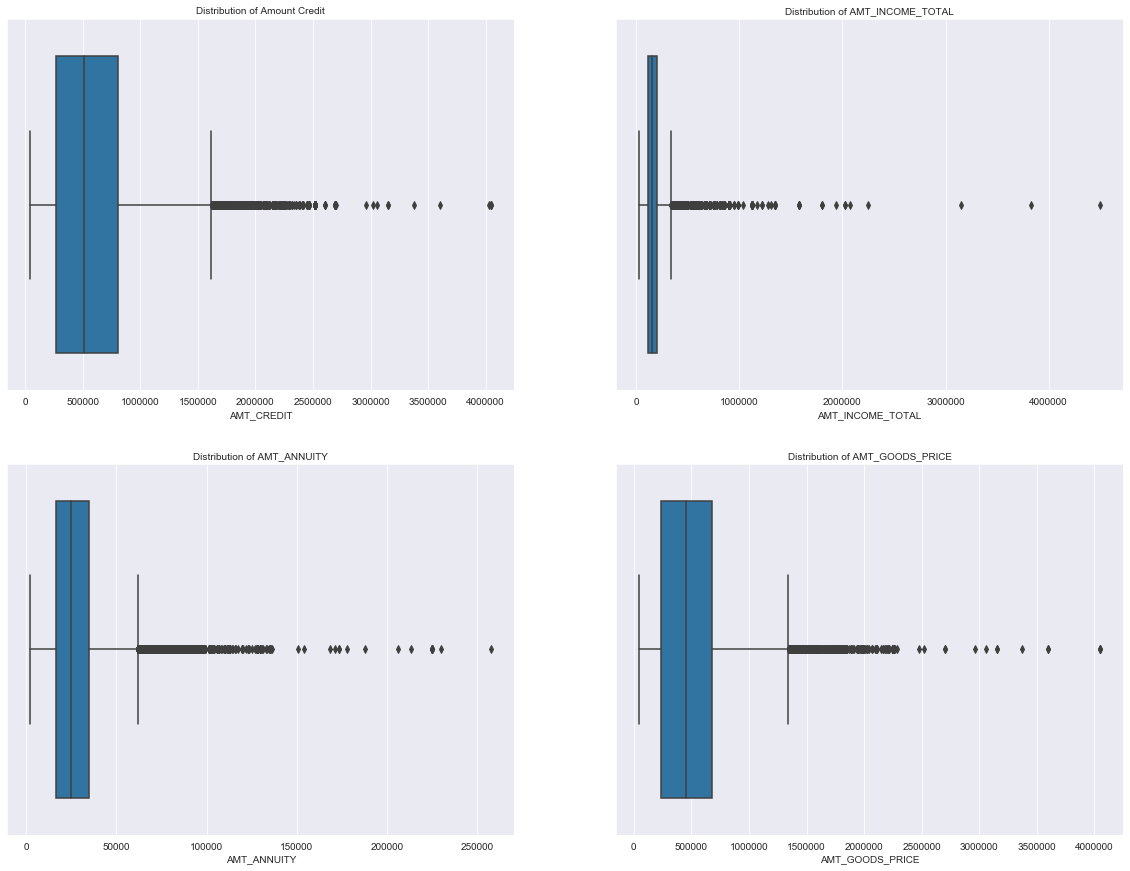

In [79]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 15))

axarr[0][0].set_title("Distribution of Amount Credit", fontsize=10)
loan_amt = df_application_data_filitered.AMT_CREDIT
loan_amt = pd.Series(loan_amt)
loan_amt = sns.boxplot(loan_amt, ax=axarr[0][0])


axarr[0][1].set_title("Distribution of AMT_INCOME_TOTAL", fontsize=10)
loan_amt = df_application_data_filitered.AMT_INCOME_TOTAL
loan_amt = pd.Series(loan_amt)
loan_amt = sns.boxplot(loan_amt, ax=axarr[0][1])

axarr[1][0].set_title("Distribution of AMT_ANNUITY", fontsize=10)
loan_amt = df_application_data_filitered.AMT_ANNUITY
loan_amt = pd.Series(loan_amt)
loan_amt = sns.boxplot(loan_amt, ax=axarr[1][0])

axarr[1][1].set_title("Distribution of AMT_GOODS_PRICE", fontsize=10)
loan_amt = df_application_data_filitered.AMT_GOODS_PRICE
loan_amt = pd.Series(loan_amt)
loan_amt = sns.boxplot(loan_amt, ax=axarr[1][1])

From the above analysis we can see that there are outliers present for the selected 4 columns. we have planned to impute the 
outliers with the median for the numeric variable....

In [80]:
def outliers(df,columns):
    import numpy as np
    import statistics as sts

    for i in columns:
        x=np.array(df[i])
        p=[]
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        LTV= Q1 - (1.5 * IQR)
        UTV= Q3 + (1.5 * IQR)
        for j in x:
            if j <= LTV or j>=UTV:
                p.append(sts.median(x))
            else:
                p.append(j)
        df[i]=p
    return df

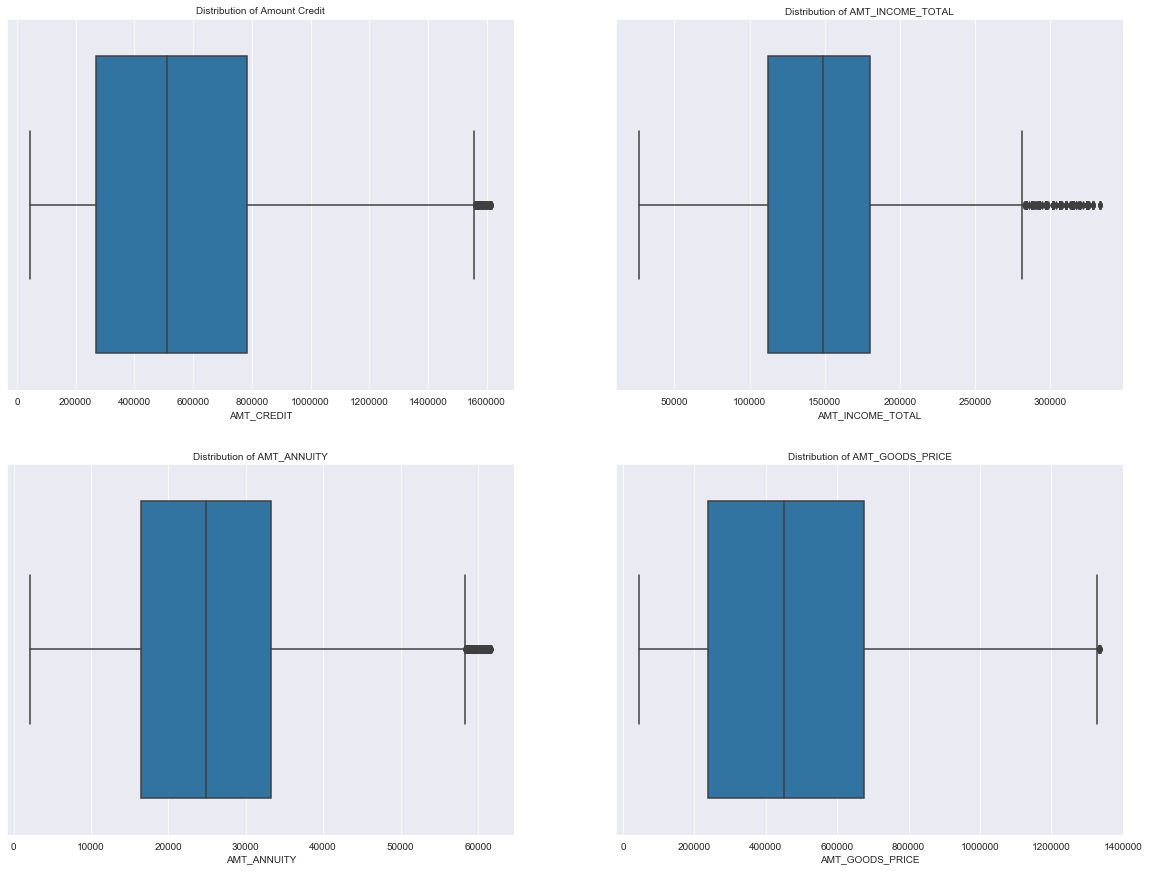

In [81]:
columns=['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
outliers(df_application_data_filitered,columns)
fig, axarr = plt.subplots(2, 2, figsize=(20, 15))

axarr[0][0].set_title("Distribution of Amount Credit", fontsize=10)
loan_amt = df_application_data_filitered.AMT_CREDIT
loan_amt = pd.Series(loan_amt)
loan_amt = sns.boxplot(loan_amt, ax=axarr[0][0])

axarr[0][1].set_title("Distribution of AMT_INCOME_TOTAL", fontsize=10)
loan_amt = df_application_data_filitered.AMT_INCOME_TOTAL
loan_amt = pd.Series(loan_amt)
loan_amt = sns.boxplot(loan_amt, ax=axarr[0][1])

axarr[1][0].set_title("Distribution of AMT_ANNUITY", fontsize=10)
loan_amt = df_application_data_filitered.AMT_ANNUITY
loan_amt = pd.Series(loan_amt)
loan_amt = sns.boxplot(loan_amt, ax=axarr[1][0])

axarr[1][1].set_title("Distribution of AMT_GOODS_PRICE", fontsize=10)
loan_amt = df_application_data_filitered.AMT_GOODS_PRICE
loan_amt = pd.Series(loan_amt)
loan_amt = sns.boxplot(loan_amt, ax=axarr[1][1])

In [82]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_application_data_filitered['Binned_AMT_INCOME']=pd.cut(df_application_data_filitered['AMT_INCOME_TOTAL'],bins,labels=slot)

In [83]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df_application_data_filitered['Binned_AMT_CREDIT']=pd.cut(df_application_data_filitered['AMT_CREDIT'],bins=bins,labels=slots)

In [84]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df_application_data_filitered.loc[df_application_data_filitered["TARGET"]==0]
target1_df=df_application_data_filitered.loc[df_application_data_filitered["TARGET"]==1]

In [46]:
Target_value = df_application_data_filitered['TARGET'].value_counts()
Target_v = pd.DataFrame({'labels': Target_value.index,
                   'values': Target_value.values
                  })
Target_v.iplot(kind='pie',labels='labels',values='values', title='Types of Loan', hole = 0.6)

In [85]:
round(len(target0_df)/len(target1_df),2)

11.19

# Univariate Analysis

For continous variable

In [91]:
def var_plot(column):
    fig,[ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
    sns.set_style("darkgrid")
    ax1.set_title("Non-Defaulters Distribution of "+column, fontsize=10)
    emi_amt = target0_df[column]
    emi_amt = pd.Series(emi_amt, name=column)
    emi_amt = sns.distplot(emi_amt, kde = False, ax=ax1)
    ax1.set(ylabel='Count of type of applicants in %')
    
    ax2.set_title("Defaulters Distribution of "+column, fontsize=10)
    emi_amt = target1_df[column]
    emi_amt = pd.Series(emi_amt, name=column)
    emi_amt = sns.distplot(emi_amt, kde = False, ax=ax2,color='red')
    ax2.set(ylabel='Count of type of applicants in %')

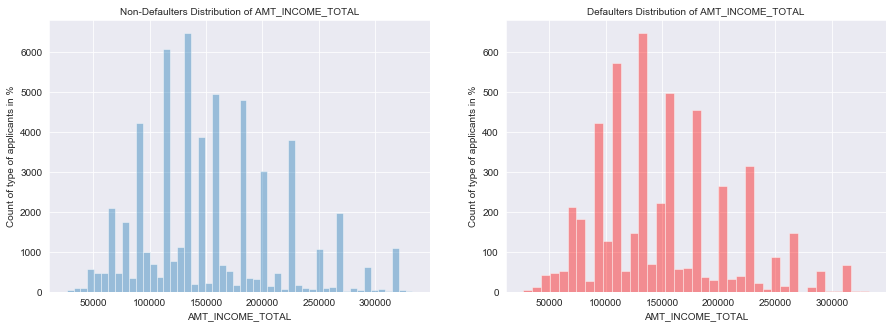

In [92]:
var_plot("AMT_INCOME_TOTAL")

#### Observations

From the above plotting we can conclude that max defaulters are having income between 100000 and 250000 which has also the max no of non defaulters

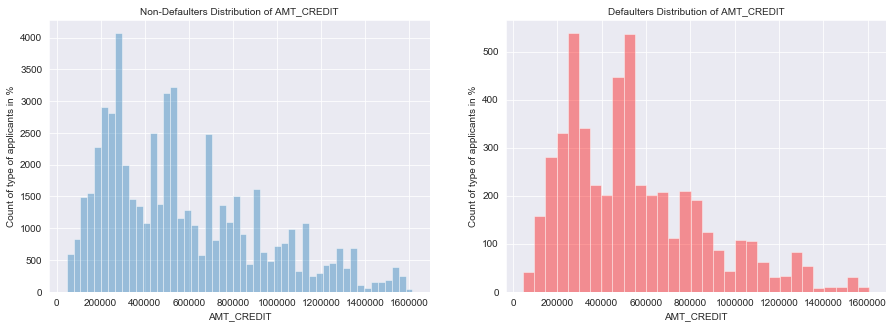

In [93]:
var_plot("AMT_CREDIT")

#### Observations

the graph of credit amount is skewed in right sight. 

people who are taking large amount of loan are likely to repay the loan

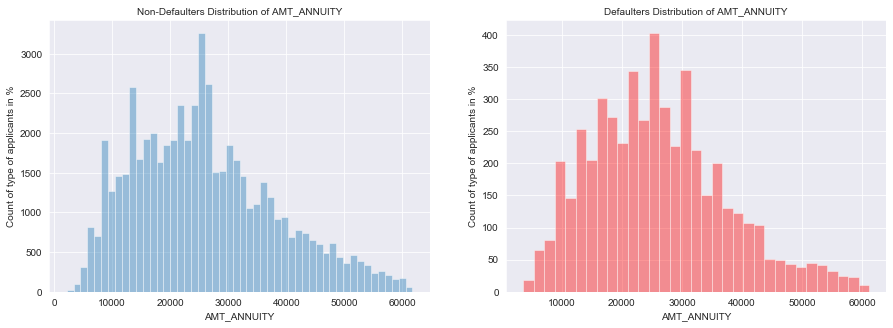

In [94]:
var_plot("AMT_ANNUITY")

#### Observations
the graph of loan annuity is rightly skewed

people with large annuity amount are likely to repay the loan.

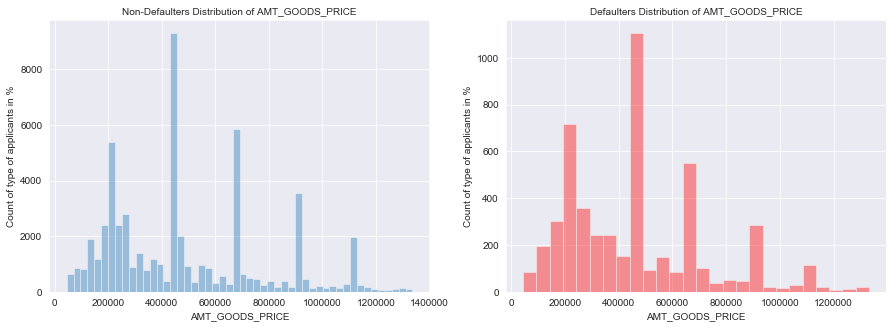

In [96]:
var_plot("AMT_GOODS_PRICE")

#### Observations
 loan given for goods amount of 20000 and 450000 has highest number of defaulters as well non defaulters

In [97]:
def plot_distribution_comp(var,nrow=2):
    i = 0

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(target1_df[feature], bw=0.5,label="Defaulters")
        sns.kdeplot(target0_df[feature], bw=0.5,label="Non Defaulters")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<Figure size 432x288 with 0 Axes>

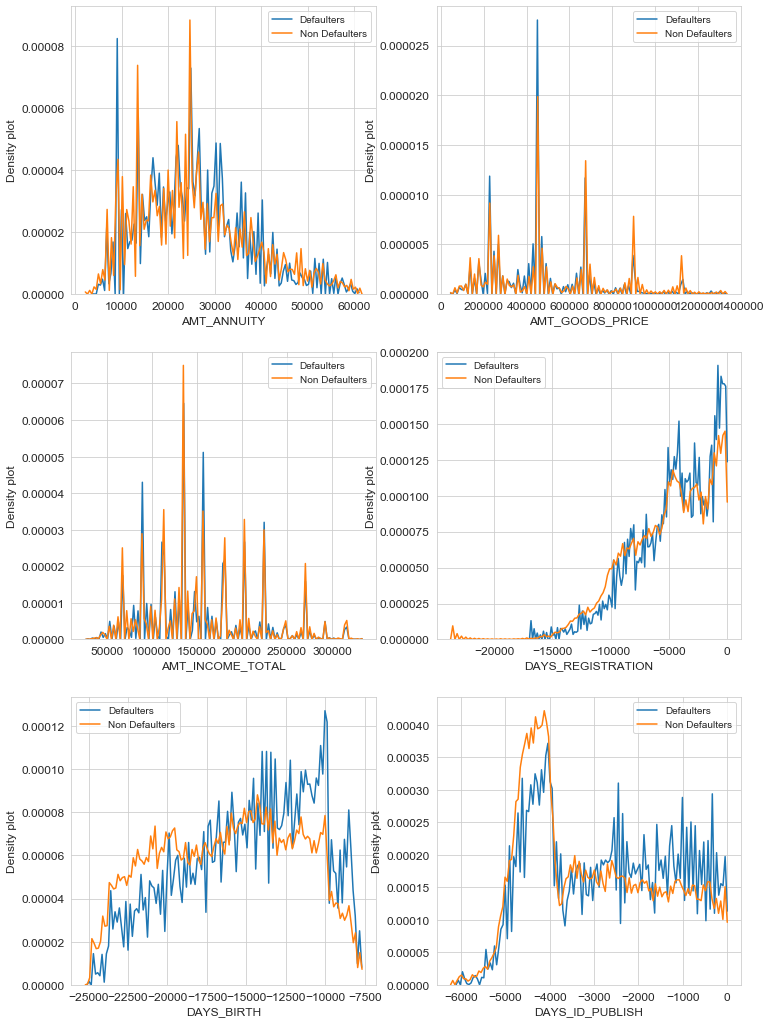

In [98]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

####Observations

Persons with age between 30 years and 50 years has high number of defaulter.

person with id changed in 1000 days of application has high number of defaulters

Univariate Analysis of Categorical variable

In [99]:
def cat_plot(column):
    temp = target1_df[column].value_counts()
    df1 = pd.DataFrame({'labels': temp.index,
                       'values': temp.values
                      })
    temp1 = target0_df[column].value_counts()
    df2 = pd.DataFrame({'labels': temp1.index,
                       'values': temp1.values
                      })
    df1.iplot(kind='pie',labels='labels',values='values', title=column+' of Defaulter Applicant\'s', hole = 0.2)
    df2.iplot(kind='pie',labels='labels',values='values', title=column+' of NonDefaulter Applicant\'s', hole = 0.2)

In [100]:
cat_plot("NAME_INCOME_TYPE")

####Observations

From the above plot we can conclude that All the Students and Businessman are repaying loan.

In [101]:
cat_plot("NAME_FAMILY_STATUS")

#### Observations:
1. Widows are more likely to repay the loan when compared to appliants with the other family statuses.

In [102]:
cat_plot("NAME_EDUCATION_TYPE")

#### Observations:
1. People with Academic Degree are more likely to repay the loan only 0.0198% have not repayed the loan

# Bi-Variate Analysis

Analysis for continous and categorical variable

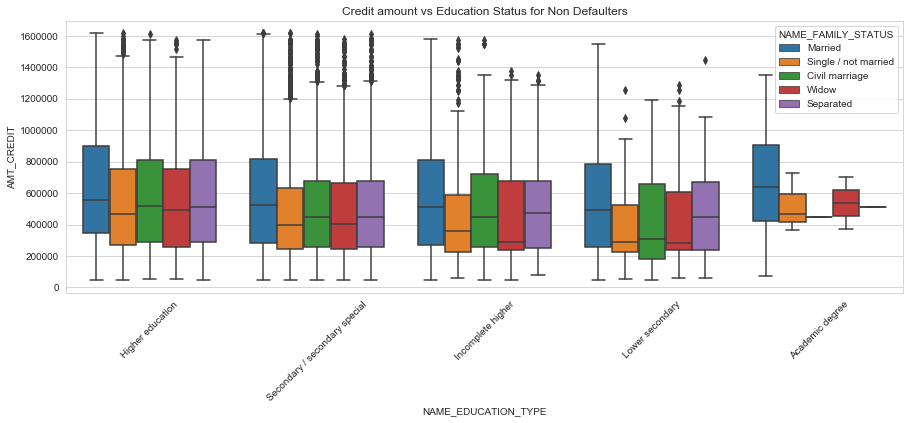

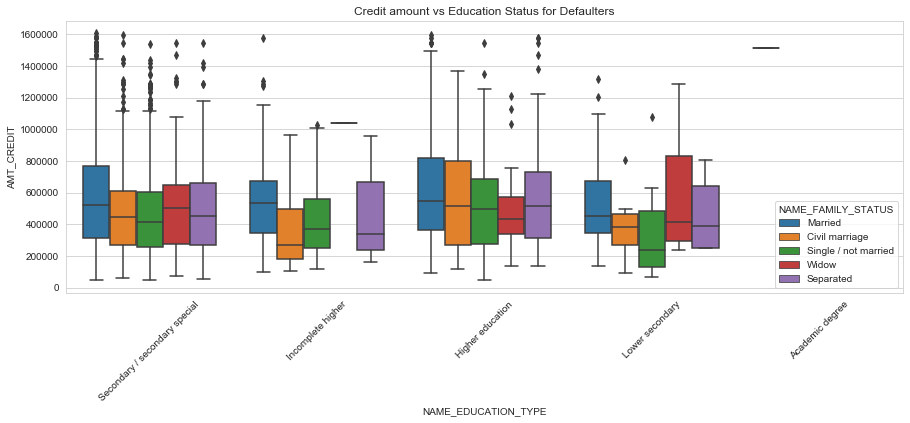

In [113]:
# Box plotting for Credit amount in y axis with education type and family status

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Non Defaulters')
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status for Defaulters')
plt.show()

From the above box plot we can conclude that for non defaulters,
Academic degree education with Family status of 'civil marriage', 'marriage' and 'separated' of  are having higher number of credits than others.

Also, higher education with family status of 'marriage', 'single' and 'civil marriage' are having more outliers.

For defaulters having higher education with Family status of 'civil marriage', 'marriage' and 'separated' are having higher number of credits than others. 

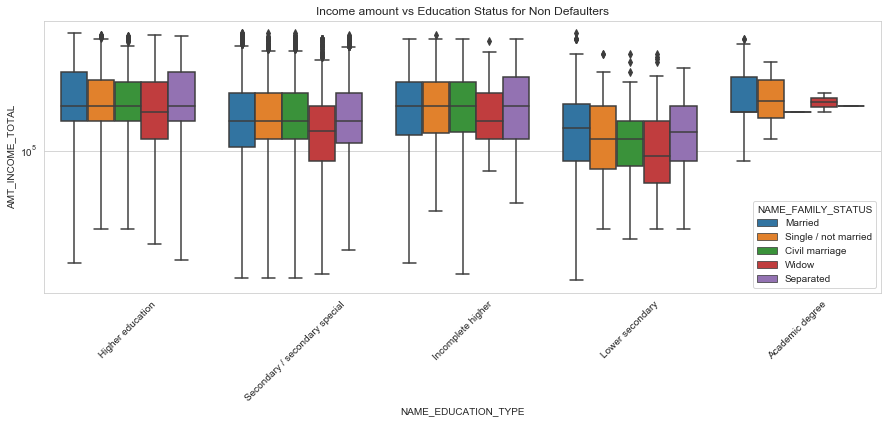

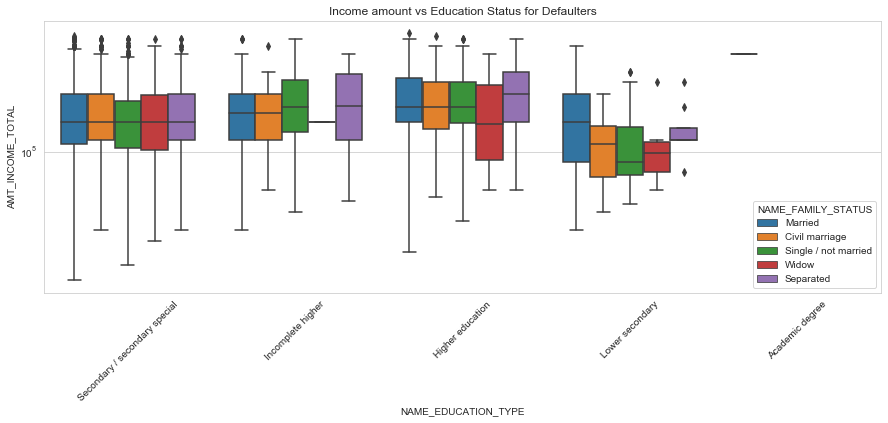

In [114]:
# logarithmic scale Box plotting for Income amount with education type and family status

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Non Defaulters')
plt.show()

plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status for Defaulters')
plt.show()

we can conclude From above boxplot for non defaulters,

Persons with 'Higher education', the income amount is mostly equal for all the family status.Lower secondary are having less income amount than others.

Continous Variable Vs continous variable

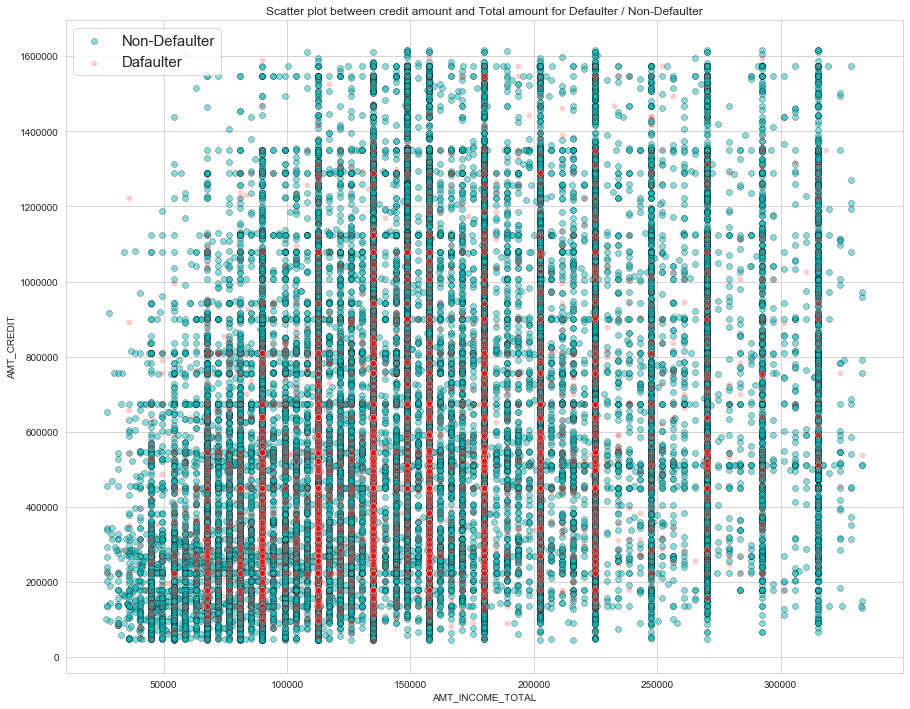

In [117]:
fig = plt.figure(figsize=(15,12))
plt.scatter(target0_df['AMT_INCOME_TOTAL'],target0_df['AMT_CREDIT'],s=35,
            color="c",alpha=.5,label="Non-Defaulter",linewidth=.5,edgecolor="k")
plt.scatter(target1_df['AMT_INCOME_TOTAL'],target1_df['AMT_CREDIT'],s=35,
             color="r",alpha=.2,label="Dafaulter",linewidth=.5,edgecolor="w")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and Total amount for Defaulter / Non-Defaulter")
plt.show()

From above scatter plot we can come conclusion that loan amount between 20000 and 100000 and total income between 10000 to 25000 has most of the deafulter list

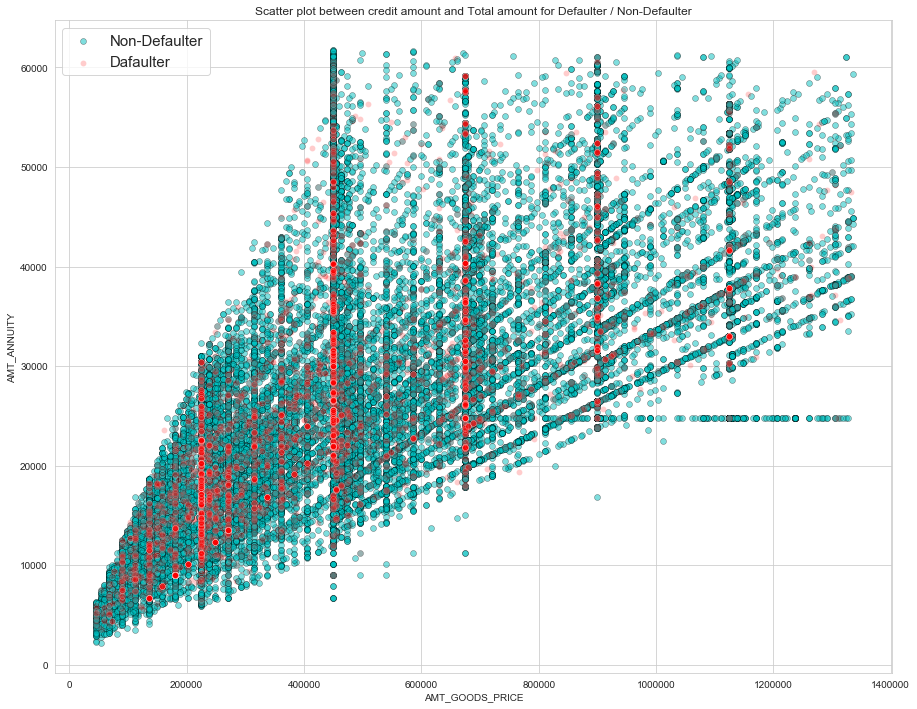

In [118]:
fig = plt.figure(figsize=(15,12))
plt.scatter(target0_df['AMT_GOODS_PRICE'],target0_df['AMT_ANNUITY'],s=35,
            color="c",alpha=.5,label="Non-Defaulter",linewidth=.5,edgecolor="k")
plt.scatter(target1_df['AMT_GOODS_PRICE'],target1_df['AMT_ANNUITY'],s=35,
             color="r",alpha=.2,label="Dafaulter",linewidth=.5,edgecolor="w")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("AMT_ANNUITY")
plt.title("Scatter plot between credit amount and Total amount for Defaulter / Non-Defaulter")
plt.show()

# Finding the corelation between continous variables

Corelation analysis for Non Defaulters list

In [121]:
##Choosing relevant continous variable for nalysis
p=[]
for i in target0_df.describe().columns:
    if(target0_df[i].nunique()>20):
        p.append(i)
p[1:]

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [124]:
corr_matrix = target0_df[p[1:]].corr()
corr_matrix.head(30)
corr_df = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df.Correlation = abs(corr_df.Correlation)
corr_df.sort_values('Correlation', ascending = False)[:20]

,Var1,Var2,Correlation
207,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998870
46,AMT_GOODS_PRICE,AMT_CREDIT,0.872538
31,AMT_ANNUITY,AMT_CREDIT,0.726145
47,AMT_GOODS_PRICE,AMT_ANNUITY,0.685869
95,DAYS_EMPLOYED,DAYS_BIRTH,0.615936
30,AMT_ANNUITY,AMT_INCOME_TOTAL,0.399277
110,DAYS_REGISTRATION,DAYS_BIRTH,0.329555
15,AMT_CREDIT,AMT_INCOME_TOTAL,0.326834
45,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.308482
126,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.274922


Corelation analysis for Defaulters list

In [127]:
##Choosing relevant continous variable for nalysis
p=[]
for i in target1_df.describe().columns:
    if(target1_df[i].nunique()>20):
        p.append(i)
p[1:]

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [128]:
corr_matrix = target1_df[p[1:]].corr()
corr_matrix.head(30)
corr_df = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df.Correlation = abs(corr_df.Correlation)
corr_df.sort_values('Correlation', ascending = False)[:20]

,Var1,Var2,Correlation
207,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998262
46,AMT_GOODS_PRICE,AMT_CREDIT,0.914401
31,AMT_ANNUITY,AMT_CREDIT,0.716854
47,AMT_GOODS_PRICE,AMT_ANNUITY,0.698576
95,DAYS_EMPLOYED,DAYS_BIRTH,0.559926
30,AMT_ANNUITY,AMT_INCOME_TOTAL,0.372147
15,AMT_CREDIT,AMT_INCOME_TOTAL,0.311432
45,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.302237
110,DAYS_REGISTRATION,DAYS_BIRTH,0.285468
125,DAYS_ID_PUBLISH,DAYS_BIRTH,0.257085


From the Above analysis we can conclude that for both defaulters and non defaulters corelations for the variables are
alsmost same but some variables like
AMT_GOODS_PRICE and AMT_CREDIT,AMT_ANNUITY and AMT_CREDIT,AMT_GOODS_PRICE and AMT_ANNUITY are slightly high corelated for 
dafaulters compare to non defaulters.

<Figure size 1440x504 with 0 Axes>

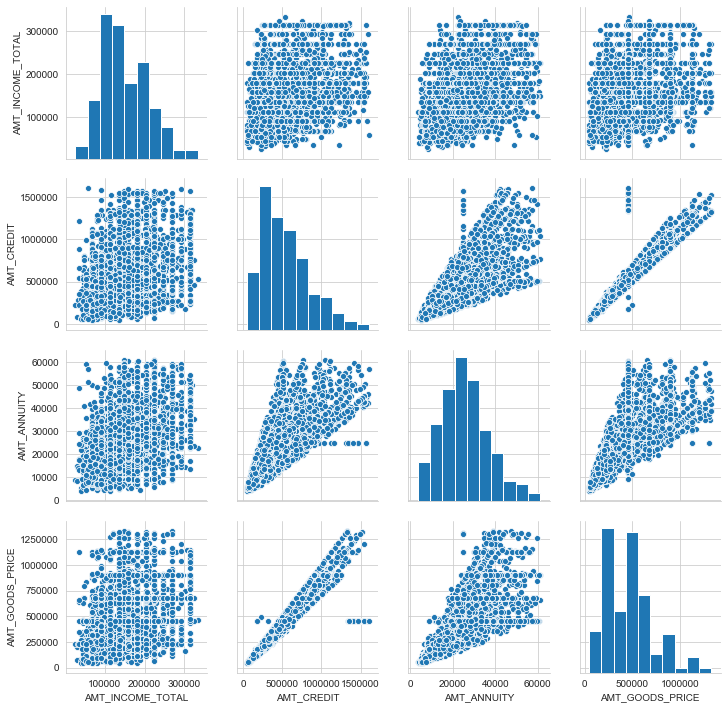

In [134]:
plt.figure(figsize=(20,7))
df_outliers = target1_df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]]
sns.pairplot(df_outliers)
#plt.title('pair plot for Defaulters')

<Figure size 1440x504 with 0 Axes>

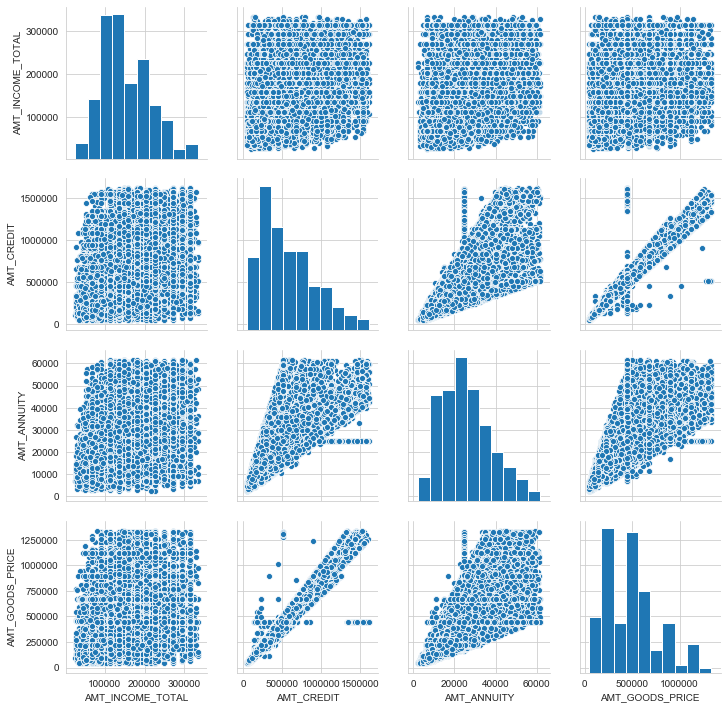

In [145]:
plt.figure(figsize=(20,7))
df_outliers = target0_df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]]
sns.pairplot(df_outliers)

Text(0.5, 1, 'Heat Map for continous variable for Defaulters')

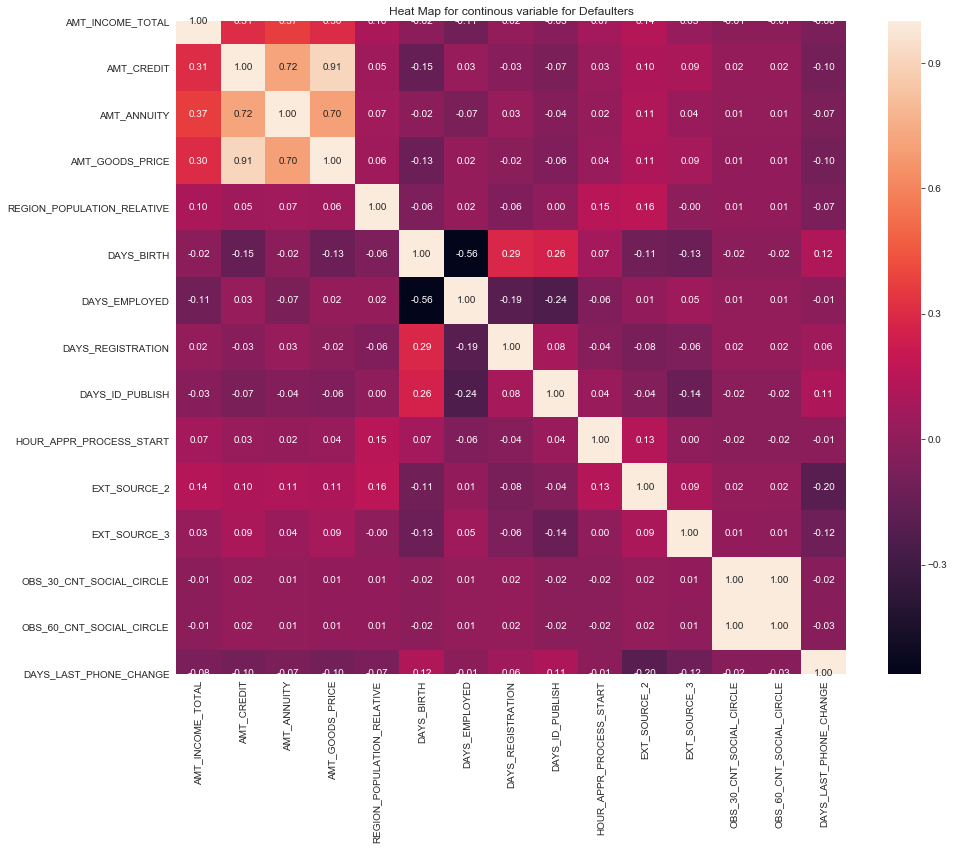

In [140]:
df_appldata_corr = target1_df[p[1:]]
plt.figure(figsize=(15,12))
ax = sns.heatmap( df_appldata_corr.corr(), annot = True, fmt=".2f")
plt.title("Heat Map for continous variable for Defaulters")

Text(0.5, 1, 'Heat Map for continous variable for Non Defaulters')

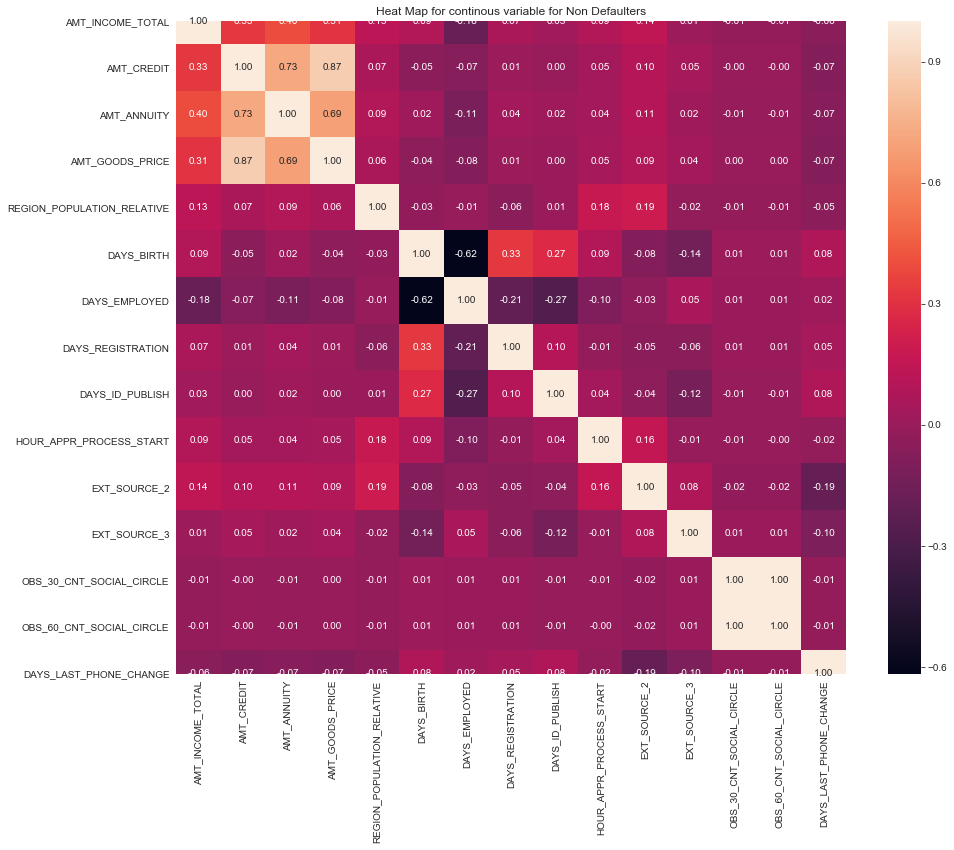

In [141]:
df_appldata_corr = target0_df[p[1:]]
plt.figure(figsize=(15,12))
ax = sns.heatmap( df_appldata_corr.corr(), annot = True, fmt=".2f")
plt.title("Heat Map for continous variable for Non Defaulters")

# Previous Data Analysis

In [193]:
f=r"C:\Users\ashutosh.c.nayak\Desktop\Course\EDA\Credit Case Study\previous_application.csv"
#num_lines = sum(1 for l in open(f))
#size = int(num_lines*0.2)
#import random
#random.seed(100)

#skip_id = random.sample(range(1,num_lines), (num_lines-size))

In [194]:
df_Previous_application_data = pd.read_csv(f)
df_Previous_application_data.shape

(1670214, 37)

In [195]:
df_Previous_application_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:

# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol=df_Previous_application_data.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

15

In [197]:

# Removing those 15 columns

emptycol = list(emptycol[emptycol.values>=0.3].index)
df_Previous_application_data.drop(labels=emptycol,axis=1,inplace=True)

df_Previous_application_data.shape

(1670214, 22)

In [198]:

# Removing the column values of 'XNA' and 'XAP'

df_Previous_application_data=df_Previous_application_data.drop(df_Previous_application_data[df_Previous_application_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_Previous_application_data=df_Previous_application_data.drop(df_Previous_application_data[df_Previous_application_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_Previous_application_data=df_Previous_application_data.drop(df_Previous_application_data[df_Previous_application_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df_Previous_application_data.shape

(69635, 22)

In [199]:
# Number of previous applications per customer
grp = df_Previous_application_data[['SK_ID_CURR','SK_ID_PREV']].groupby(by=['SK_ID_CURR'])['SK_ID_PREV'].count().reset_index().rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'})
application_prev_data = df_application_data_filitered.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_prev_data['PREV_APP_COUNT'] = application_prev_data['PREV_APP_COUNT'].fillna(0)
# Combining numerical features
grp = df_Previous_application_data.drop('SK_ID_PREV', axis =1).groupby(by=['SK_ID_CURR']).mean().reset_index()
prev_columns = ['PREV_'+column if column != 'SK_ID_CURR' else column for column in grp.columns ]
grp.columns = prev_columns
application_prev_data = application_prev_data.merge(grp, on =['SK_ID_CURR'], how = 'left')
application_prev_data.update(application_prev_data[grp.columns].fillna(0))
# Combining categorical features
application_prev_data = application_prev_data.merge(df_Previous_application_data, on=['SK_ID_CURR'], how='inner',suffixes='_x')

In [200]:
application_prev_data.shape

(11914, 103)

In [201]:
application_prev_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100080,0,Revolving loans,F,N,N,1,157500.0,450000.0,22500.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
2,100089,0,Cash loans,M,N,Y,0,135000.0,337761.0,15781.5,...,Cash through the bank,SCOFR,Refreshed,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
3,100098,0,Revolving loans,M,Y,N,0,225000.0,270000.0,13500.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,AP+ (Cash loan),120,XNA,high
4,100270,0,Revolving loans,F,N,Y,0,90000.0,337500.0,16875.0,...,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Credit and cash offices,100,XNA,high


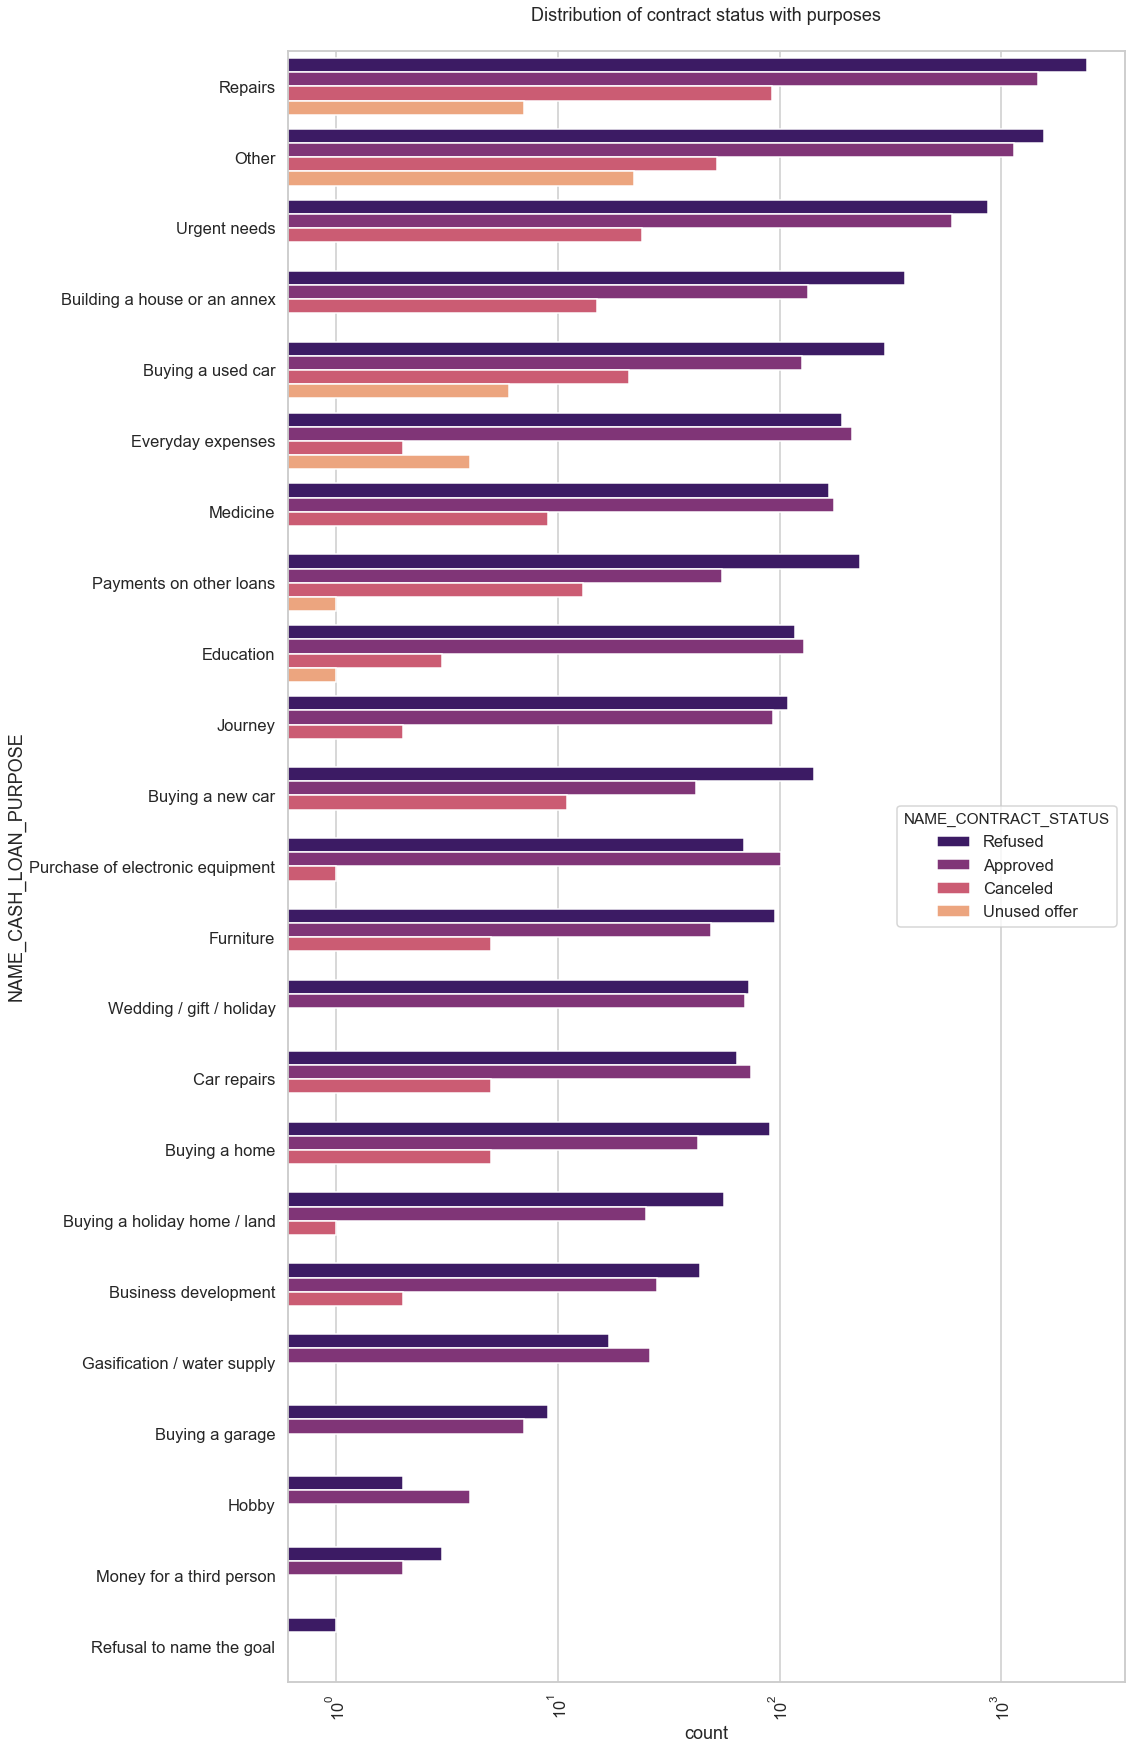

In [205]:
# Distribution of contract status with puposes in logarithmic scale

sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = application_prev_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=application_prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

From the above analysis we can conclude that:

Loan taken fr purpose of repair has highest no of rejection

For education purposes we have almost equal number of approves and rejection

loan taken for the purpose of "Payign other loans" and "buying a new car" is having significant higher rejection than approves.

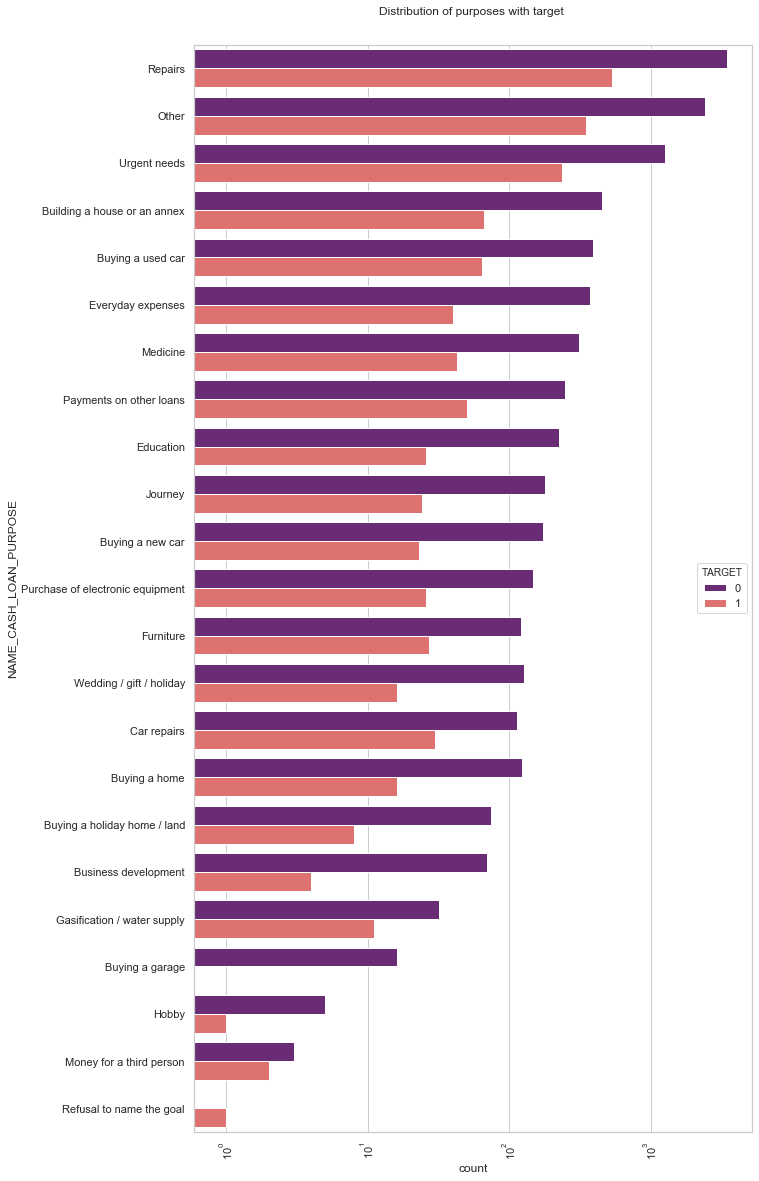

In [225]:
# Distribution of contract status with Taget

sns.set_style('whitegrid')
plt.figure(figsize=(10,20))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = application_prev_data, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=application_prev_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

From the above plot we can conclude below points:

Loan taken for the purpose of 'Repairs' are most of te defaulters.

Loan taken for the purpoese of 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' are most of the defaulters.

Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

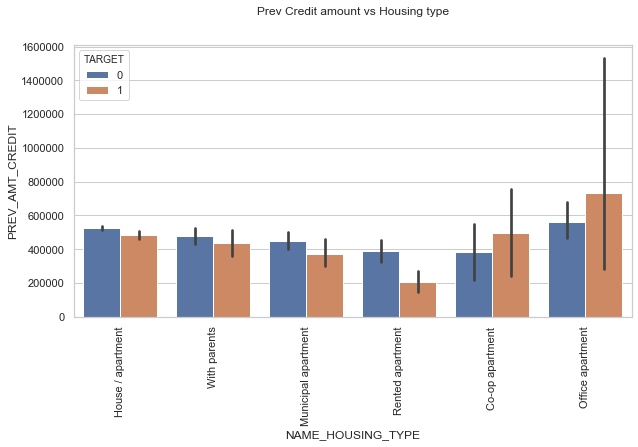

In [223]:

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data =application_prev_data, y='PREV_AMT_CREDIT',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

From the above anlysis we can conclude that House/appartment is having higher credit of non defaulter
and co-op apartment is having higher credit of Defaulters.

we should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.

# Findings From The Analysis

The case study aims to find the facotrs affecting the loan repayment of individuals for a bank. This aims to develop a basic 
understanding of risk analystics in banking and financial services.

1.eople who are taking large amount of loan are likely to repay the loan

2.Persons with age between 30 years and 50 years has high number of defaulter.

3.person with id changed in 1000 days of application has high number of defaulters.

4.From the above plot we can conclude that All the Students and Businessman are repaying loan.

5.Widows are more likely to repay the loan when compared to appliants with the other family statuses.

6.People with Academic Degree are more likely to repay the loan only 0.0198% have not repayed the loan.

7.The focus of the bank should be more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

8.The focus of the bank should be less on income type ‘Working’ as they are having most number of unsuccessful payments.

9.Loan taken for the purpose ‘Repair’ is having higher number of unsuccessful payments on time.

# Ashutosh Nayak


# Mahesh Prasad Mishra